Install these dependencies

In [ ]:
%pip install nibabel
%pip install nilearn
%pip install SimpleITK
%pip install dcm2niix

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.4/573.4 kB 22.1 MB/s eta 0:00:00


Import dependencies

In [ ]:
import gdown
import os
import shutil
import subprocess
import nibabel as nib
import nilearn.image as nimg
import numpy as np
import matplotlib.pyplot as plt
import json
from google.colab import files

Mount google drive

In [ ]:
# Only run this if you use GG colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Download the raw dataset

In [ ]:
# Google Drive file ID (from the shared link)
file_id = "1clWkwfoVhm8eSW9QVFxUWMjaRGD2XA72"
file_name = "raw_data.zip"
file_path = "/content/" + file_name

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", file_name, quiet=False)
print(f"Downloaded: {file_path}")

Downloading...
From (original): https://drive.google.com/uc?id=1clWkwfoVhm8eSW9QVFxUWMjaRGD2XA72
From (redirected): https://drive.google.com/uc?id=1clWkwfoVhm8eSW9QVFxUWMjaRGD2XA72&confirm=t&uuid=9a4f82b5-9bad-476a-811d-d6ad466594f6
To: /content/raw_data.zip
100%|██████████| 4.12G/4.12G [01:02<00:00, 66.5MB/s]

Downloaded: /content/raw_data.zip


Unzip these files

In [ ]:
!unzip 'raw_data.zip'


Streaming output truncated to the last 5000 lines.
  inflating: split_dicom_data/train/data/17 - TRAN TRUNG DUNG - raw/IM000182  
  inflating: split_dicom_data/train/data/17 - TRAN TRUNG DUNG - raw/IM000183  
  inflating: split_dicom_data/train/data/17 - TRAN TRUNG DUNG - raw/IM000184  
  inflating: split_dicom_data/train/data/17 - TRAN TRUNG DUNG - raw/IM000185  
  inflating: split_dicom_data/train/data/17 - TRAN TRUNG DUNG - raw/IM000186  
  inflating: split_dicom_data/train/data/17 - TRAN TRUNG DUNG - raw/IM000187  
  inflating: split_dicom_data/train/data/17 - TRAN TRUNG DUNG - raw/IM000188  
  inflating: split_dicom_data/train/data/17 - TRAN TRUNG DUNG - raw/IM000189  
  inflating: split_dicom_data/train/data/17 - TRAN TRUNG DUNG - raw/IM000190  
  inflating: split_dicom_data/train/data/17 - TRAN TRUNG DUNG - raw/IM000191  
  inflating: split_dicom_data/train/data/17 - TRAN TRUNG DUNG - raw/IM000192  
  inflating: split_dicom_data/train/data/17 - TRAN TRUNG DUNG - raw/IM000193  
 

Convert multiple DICOM files of each sample into a single NlfTl (input format of nnUNet)

In [ ]:
# Input: folder containing all patient DICOM folders
dicom_root = r"split_dicom_data/train/data"
output_root = r"Dataset001_MyDataset/imagesTr"

# Create output folder if not exists
os.makedirs(output_root, exist_ok=True)

# Patient counter
patient_id = 1

for patient in sorted(os.listdir(dicom_root)):
    patient_path = os.path.join(dicom_root, patient)
    if os.path.isdir(patient_path):
        print(f"Converting {patient}...")

        # Temporary output (dcm2niix will dump here)
        temp_out = os.path.join(output_root, "tmp")
        os.makedirs(temp_out, exist_ok=True)

        # Run dcm2niix
        subprocess.run([
            "dcm2niix",
            "-z", "y",              # gzip compression
            "-o", temp_out,         # output folder (temporary)
            patient_path            # input DICOM folder
        ])

        # Find the converted .nii.gz file
        for f in os.listdir(temp_out):
            if f.endswith(".nii") or f.endswith(".nii.gz"):
                old_path = os.path.join(temp_out, f)

                # Rename to nnU-Net format
                new_filename = f"la_{patient_id:03d}_0000.nii.gz"
                new_path = os.path.join(output_root, new_filename)

                # Ensure gzip compressed
                if not old_path.endswith(".nii.gz"):
                    new_path_tmp = new_path.replace(".nii.gz", ".nii")
                    shutil.move(old_path, new_path_tmp)
                    subprocess.run(["gzip", new_path_tmp])
                else:
                    shutil.move(old_path, new_path)

                print(f"Renamed to {new_filename}")

        # Clean up temp
        shutil.rmtree(temp_out)

        patient_id += 1


Converting 02 - PHAM NGOC ANH - raw...
Renamed to la_001_0000.nii.gz
Converting 03 - HUYNH THI THANH XUAN - raw...
Renamed to la_002_0000.nii.gz
Converting 06 - TRAN HUNG DAO - raw...
Renamed to la_003_0000.nii.gz
Converting 07 - LUC NGOC HAI - raw...
Renamed to la_004_0000.nii.gz
Converting 09 - HOANG VAN DANG - raw...
Renamed to la_005_0000.nii.gz
Converting 10 - PHAN THI SAU - raw...
Renamed to la_006_0000.nii.gz
Converting 11 - NGUYEN THI BE - raw...
Renamed to la_007_0000.nii.gz
Converting 12 - TRAN THI TRANG - raw...
Renamed to la_008_0000.nii.gz
Converting 13 - VO HOANG VAN - raw...
Renamed to la_009_0000.nii.gz
Converting 14 - NGUYEN XUAN LOC - raw...
Renamed to la_010_0000.nii.gz
Converting 16 - NGUYEN THI NGUNG - raw...
Renamed to la_011_0000.nii.gz
Converting 17 - TRAN TRUNG DUNG - raw...
Renamed to la_012_0000.nii.gz
Converting 19 - NGUYEN QUANG TAN - raw...
Renamed to la_013_0000.nii.gz
Converting 21 - VAN DINH QUY - raw...
Renamed to la_014_0000.nii.gz
Converting 25 - HO 

Move segmentation file to new folder

In [ ]:
import os
import shutil

# Input: source folder containing label .nii.gz files
seg_root = r"split_dicom_data/train/labels"
labels_root = r"Dataset001_MyDataset/labelsTr"

# Make sure output folder exists
os.makedirs(labels_root, exist_ok=True)

# Patient counter
patient_id = 1

# Loop over segmentation files directly in labels folder
for file in sorted(os.listdir(seg_root)):
    if file.endswith(('.nii', '.nii.gz')):
        src_path = os.path.join(seg_root, file)

        # Rename to nnU-Net format
        new_filename = f"la_{patient_id:03d}.nii.gz"
        new_path = os.path.join(labels_root, new_filename)

        # Ensure unique filename if collision
        counter = 1
        while os.path.exists(new_path):
            new_filename = f"la_{patient_id:03d}_{counter}.nii.gz"
            new_path = os.path.join(labels_root, new_filename)
            counter += 1

        # Copy file
        shutil.copy2(src_path, new_path)
        print(f"✅ Copied: {src_path} → {new_path}")

        # Increment ID
        patient_id += 1

print("\n🎯 All label files copied and renamed successfully!")


✅ Copied: split_dicom_data/train/labels/la_002.nii.gz → Dataset001_MyDataset/labelsTr/la_001.nii.gz
✅ Copied: split_dicom_data/train/labels/la_003.nii.gz → Dataset001_MyDataset/labelsTr/la_002.nii.gz
✅ Copied: split_dicom_data/train/labels/la_006.nii.gz → Dataset001_MyDataset/labelsTr/la_003.nii.gz
✅ Copied: split_dicom_data/train/labels/la_007.nii.gz → Dataset001_MyDataset/labelsTr/la_004.nii.gz
✅ Copied: split_dicom_data/train/labels/la_009.nii.gz → Dataset001_MyDataset/labelsTr/la_005.nii.gz
✅ Copied: split_dicom_data/train/labels/la_010.nii.gz → Dataset001_MyDataset/labelsTr/la_006.nii.gz
✅ Copied: split_dicom_data/train/labels/la_011.nii.gz → Dataset001_MyDataset/labelsTr/la_007.nii.gz
✅ Copied: split_dicom_data/train/labels/la_012.nii.gz → Dataset001_MyDataset/labelsTr/la_008.nii.gz
✅ Copied: split_dicom_data/train/labels/la_013.nii.gz → Dataset001_MyDataset/labelsTr/la_009.nii.gz
✅ Copied: split_dicom_data/train/labels/la_014.nii.gz → Dataset001_MyDataset/labelsTr/la_010.nii.gz


Resample segmentation file to match new images

In [ ]:
ref_root = r"Dataset001_MyDataset/imagesTr"
seg_root = r"Dataset001_MyDataset/labelsTr"

for f in os.listdir(ref_root):
    if not f.endswith(".nii.gz"):
        continue

    ref_path = os.path.join(ref_root, f)
    seg_path = os.path.join(seg_root, f.replace("_0000", ""))  # Remove _0000 for label files

    if not os.path.exists(seg_path):
        print(f"No segmentation found for {f}")
        continue

    print(f"Resampling {seg_path} -> match {ref_path}")

    # Load images
    ref = nib.load(ref_path)
    seg = nib.load(seg_path)

    # Resample segmentation to match reference
    seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')

    # Save output
    nib.save(seg_resampled, seg_path)


Resampling Dataset001_MyDataset/labelsTr/la_015.nii.gz -> match Dataset001_MyDataset/imagesTr/la_015_0000.nii.gz


/tmp/ipython-input-1105302431.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-1105302431.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset001_MyDataset/labelsTr/la_022.nii.gz -> match Dataset001_MyDataset/imagesTr/la_022_0000.nii.gz


/tmp/ipython-input-1105302431.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-1105302431.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset001_MyDataset/labelsTr/la_002.nii.gz -> match Dataset001_MyDataset/imagesTr/la_002_0000.nii.gz


/tmp/ipython-input-1105302431.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-1105302431.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset001_MyDataset/labelsTr/la_029.nii.gz -> match Dataset001_MyDataset/imagesTr/la_029_0000.nii.gz


/tmp/ipython-input-1105302431.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-1105302431.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset001_MyDataset/labelsTr/la_020.nii.gz -> match Dataset001_MyDataset/imagesTr/la_020_0000.nii.gz


/tmp/ipython-input-1105302431.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-1105302431.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset001_MyDataset/labelsTr/la_018.nii.gz -> match Dataset001_MyDataset/imagesTr/la_018_0000.nii.gz


/tmp/ipython-input-1105302431.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-1105302431.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset001_MyDataset/labelsTr/la_011.nii.gz -> match Dataset001_MyDataset/imagesTr/la_011_0000.nii.gz


/tmp/ipython-input-1105302431.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-1105302431.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset001_MyDataset/labelsTr/la_019.nii.gz -> match Dataset001_MyDataset/imagesTr/la_019_0000.nii.gz


/tmp/ipython-input-1105302431.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-1105302431.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset001_MyDataset/labelsTr/la_007.nii.gz -> match Dataset001_MyDataset/imagesTr/la_007_0000.nii.gz


/tmp/ipython-input-1105302431.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-1105302431.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset001_MyDataset/labelsTr/la_010.nii.gz -> match Dataset001_MyDataset/imagesTr/la_010_0000.nii.gz


/tmp/ipython-input-1105302431.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-1105302431.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset001_MyDataset/labelsTr/la_021.nii.gz -> match Dataset001_MyDataset/imagesTr/la_021_0000.nii.gz


/tmp/ipython-input-1105302431.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-1105302431.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset001_MyDataset/labelsTr/la_009.nii.gz -> match Dataset001_MyDataset/imagesTr/la_009_0000.nii.gz


/tmp/ipython-input-1105302431.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-1105302431.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset001_MyDataset/labelsTr/la_004.nii.gz -> match Dataset001_MyDataset/imagesTr/la_004_0000.nii.gz


/tmp/ipython-input-1105302431.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-1105302431.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset001_MyDataset/labelsTr/la_006.nii.gz -> match Dataset001_MyDataset/imagesTr/la_006_0000.nii.gz


/tmp/ipython-input-1105302431.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-1105302431.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset001_MyDataset/labelsTr/la_008.nii.gz -> match Dataset001_MyDataset/imagesTr/la_008_0000.nii.gz


/tmp/ipython-input-1105302431.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-1105302431.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset001_MyDataset/labelsTr/la_014.nii.gz -> match Dataset001_MyDataset/imagesTr/la_014_0000.nii.gz


/tmp/ipython-input-1105302431.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-1105302431.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset001_MyDataset/labelsTr/la_023.nii.gz -> match Dataset001_MyDataset/imagesTr/la_023_0000.nii.gz


/tmp/ipython-input-1105302431.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-1105302431.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset001_MyDataset/labelsTr/la_012.nii.gz -> match Dataset001_MyDataset/imagesTr/la_012_0000.nii.gz


/tmp/ipython-input-1105302431.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-1105302431.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset001_MyDataset/labelsTr/la_017.nii.gz -> match Dataset001_MyDataset/imagesTr/la_017_0000.nii.gz


/tmp/ipython-input-1105302431.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-1105302431.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset001_MyDataset/labelsTr/la_003.nii.gz -> match Dataset001_MyDataset/imagesTr/la_003_0000.nii.gz


/tmp/ipython-input-1105302431.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-1105302431.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset001_MyDataset/labelsTr/la_013.nii.gz -> match Dataset001_MyDataset/imagesTr/la_013_0000.nii.gz


/tmp/ipython-input-1105302431.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-1105302431.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset001_MyDataset/labelsTr/la_027.nii.gz -> match Dataset001_MyDataset/imagesTr/la_027_0000.nii.gz


/tmp/ipython-input-1105302431.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-1105302431.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset001_MyDataset/labelsTr/la_030.nii.gz -> match Dataset001_MyDataset/imagesTr/la_030_0000.nii.gz


/tmp/ipython-input-1105302431.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-1105302431.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset001_MyDataset/labelsTr/la_026.nii.gz -> match Dataset001_MyDataset/imagesTr/la_026_0000.nii.gz


/tmp/ipython-input-1105302431.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-1105302431.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset001_MyDataset/labelsTr/la_016.nii.gz -> match Dataset001_MyDataset/imagesTr/la_016_0000.nii.gz


/tmp/ipython-input-1105302431.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-1105302431.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset001_MyDataset/labelsTr/la_024.nii.gz -> match Dataset001_MyDataset/imagesTr/la_024_0000.nii.gz


/tmp/ipython-input-1105302431.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-1105302431.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset001_MyDataset/labelsTr/la_025.nii.gz -> match Dataset001_MyDataset/imagesTr/la_025_0000.nii.gz


/tmp/ipython-input-1105302431.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-1105302431.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset001_MyDataset/labelsTr/la_031.nii.gz -> match Dataset001_MyDataset/imagesTr/la_031_0000.nii.gz


/tmp/ipython-input-1105302431.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-1105302431.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset001_MyDataset/labelsTr/la_028.nii.gz -> match Dataset001_MyDataset/imagesTr/la_028_0000.nii.gz


/tmp/ipython-input-1105302431.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-1105302431.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset001_MyDataset/labelsTr/la_032.nii.gz -> match Dataset001_MyDataset/imagesTr/la_032_0000.nii.gz


/tmp/ipython-input-1105302431.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-1105302431.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset001_MyDataset/labelsTr/la_005.nii.gz -> match Dataset001_MyDataset/imagesTr/la_005_0000.nii.gz


/tmp/ipython-input-1105302431.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-1105302431.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset001_MyDataset/labelsTr/la_001.nii.gz -> match Dataset001_MyDataset/imagesTr/la_001_0000.nii.gz


/tmp/ipython-input-1105302431.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-1105302431.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Print out 1 sample's channels

Print out 1 sample's intensity range, and a middle slice

Shape: (512, 512, 283)
Intensity range: -2681.0 to 4772.0


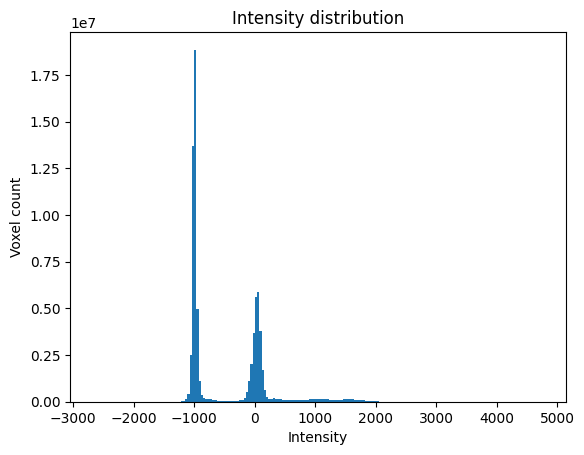

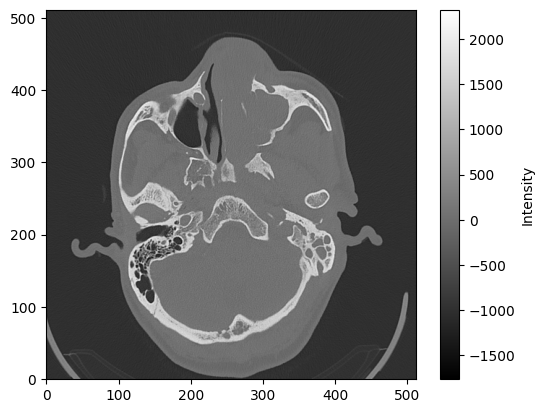

In [ ]:
# Load the NIfTI file
img = nib.load("Dataset001_MyDataset/imagesTr/la_021_0000.nii.gz")

# Get the data array
data = img.get_fdata()   # shape: (X, Y, Z)

print("Shape:", data.shape)
print("Intensity range:", np.min(data), "to", np.max(data))

# Plot histogram of intensities
plt.hist(data.flatten(), bins=200)
plt.xlabel("Intensity")
plt.ylabel("Voxel count")
plt.title("Intensity distribution")
plt.show()

# Show a middle slice
mid_slice = data[:, :, data.shape[2]//2]
plt.imshow(mid_slice.T, cmap="gray", origin="lower")
plt.colorbar(label="Intensity")
plt.show()


We will now apply clipping and normalization to the images' channels

In [ ]:
import SimpleITK as sitk
import numpy as np
import os
from glob import glob

def preprocess_image(input_path, output_path):
    """
    Apply only 5th–99.5th percentile clipping.
    """
    # Load
    img = sitk.ReadImage(input_path)
    arr = sitk.GetArrayFromImage(img)  # (z, y, x)

    # --- Step 1: Clip intensities ---
    low, high = np.percentile(arr, [5, 99.5])
    arr = np.clip(arr, low, high)

    # Put back into image
    img_clipped = sitk.GetImageFromArray(arr)
    img_clipped.CopyInformation(img)

    # Save result
    sitk.WriteImage(img_clipped, output_path)

def normalize_image(input_path, output_path, method="minmax"):
    """
    Normalize image intensities.
    method = "minmax" → scale to [0,1]
    method = "zscore" → zero mean, unit variance
    """
    # Load
    img = sitk.ReadImage(input_path)
    arr = sitk.GetArrayFromImage(img)  # (z, y, x)

    # --- Step: Normalize ---
    if method == "minmax":
        arr = (arr - arr.min()) / (arr.max() - arr.min() + 1e-8)
    elif method == "zscore":
        arr = (arr - arr.mean()) / (arr.std() + 1e-8)
    else:
        raise ValueError("method must be 'minmax' or 'zscore'")

    # Save result
    img_norm = sitk.GetImageFromArray(arr.astype(np.float32))
    img_norm.CopyInformation(img)
    sitk.WriteImage(img_norm, output_path)

In [ ]:
# 🔹 Apply to dataset
input_dir = "Dataset001_MyDataset/imagesTr"
output_dir = "Dataset001_MyDataset_Preprocessed/imagesTr"
os.makedirs(output_dir, exist_ok=True)

for path in glob(os.path.join(input_dir, "*.nii.gz")):
    fname = os.path.basename(path)
    out_path = os.path.join(output_dir, fname)
    print(f"Processing {fname} → {out_path}")
    preprocess_image(path, out_path)



Processing la_015_0000.nii.gz → Dataset001_MyDataset_Preprocessed/imagesTr/la_015_0000.nii.gz
Processing la_022_0000.nii.gz → Dataset001_MyDataset_Preprocessed/imagesTr/la_022_0000.nii.gz
Processing la_002_0000.nii.gz → Dataset001_MyDataset_Preprocessed/imagesTr/la_002_0000.nii.gz
Processing la_029_0000.nii.gz → Dataset001_MyDataset_Preprocessed/imagesTr/la_029_0000.nii.gz
Processing la_020_0000.nii.gz → Dataset001_MyDataset_Preprocessed/imagesTr/la_020_0000.nii.gz
Processing la_018_0000.nii.gz → Dataset001_MyDataset_Preprocessed/imagesTr/la_018_0000.nii.gz
Processing la_011_0000.nii.gz → Dataset001_MyDataset_Preprocessed/imagesTr/la_011_0000.nii.gz
Processing la_019_0000.nii.gz → Dataset001_MyDataset_Preprocessed/imagesTr/la_019_0000.nii.gz
Processing la_007_0000.nii.gz → Dataset001_MyDataset_Preprocessed/imagesTr/la_007_0000.nii.gz
Processing la_010_0000.nii.gz → Dataset001_MyDataset_Preprocessed/imagesTr/la_010_0000.nii.gz
Processing la_021_0000.nii.gz → Dataset001_MyDataset_Preproc

Shape: (512, 512, 283)
Intensity range: -1038.0 to 1766.0


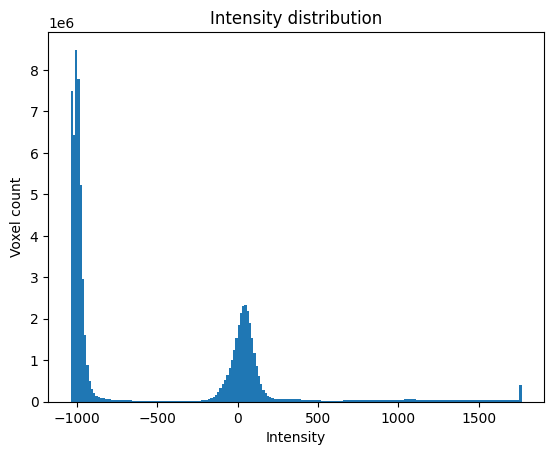

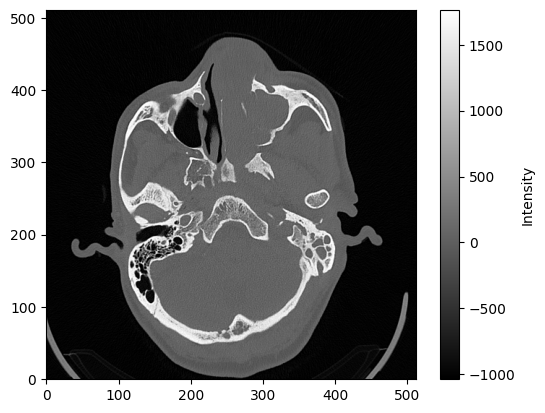

In [ ]:
# Load the NIfTI file
img = nib.load("Dataset001_MyDataset_Preprocessed/imagesTr/la_021_0000.nii.gz")

# Get the data array
data = img.get_fdata()   # shape: (X, Y, Z)

print("Shape:", data.shape)
print("Intensity range:", np.min(data), "to", np.max(data))

# Plot histogram of intensities
plt.hist(data.flatten(), bins=200)
plt.xlabel("Intensity")
plt.ylabel("Voxel count")
plt.title("Intensity distribution")
plt.show()

# Show a middle slice
mid_slice = data[:, :, data.shape[2]//2]
plt.imshow(mid_slice.T, cmap="gray", origin="lower")
plt.colorbar(label="Intensity")
plt.show()


In [ ]:
# 🔹 Apply to dataset
input_dir = "Dataset001_MyDataset_Preprocessed/imagesTr"
output_dir = "Dataset001_MyDataset_Preprocessed/imagesTr"
os.makedirs(output_dir, exist_ok=True)

for path in glob(os.path.join(input_dir, "*.nii.gz")):
    fname = os.path.basename(path)
    out_path = os.path.join(output_dir, fname)
    print(f"Processing {fname} → {out_path}")
    normalize_image(path, out_path, method="minmax")  # change to "zscore" if needed


Processing la_015_0000.nii.gz → Dataset001_MyDataset_Preprocessed/imagesTr/la_015_0000.nii.gz
Processing la_022_0000.nii.gz → Dataset001_MyDataset_Preprocessed/imagesTr/la_022_0000.nii.gz
Processing la_002_0000.nii.gz → Dataset001_MyDataset_Preprocessed/imagesTr/la_002_0000.nii.gz
Processing la_029_0000.nii.gz → Dataset001_MyDataset_Preprocessed/imagesTr/la_029_0000.nii.gz
Processing la_020_0000.nii.gz → Dataset001_MyDataset_Preprocessed/imagesTr/la_020_0000.nii.gz
Processing la_018_0000.nii.gz → Dataset001_MyDataset_Preprocessed/imagesTr/la_018_0000.nii.gz
Processing la_011_0000.nii.gz → Dataset001_MyDataset_Preprocessed/imagesTr/la_011_0000.nii.gz
Processing la_019_0000.nii.gz → Dataset001_MyDataset_Preprocessed/imagesTr/la_019_0000.nii.gz
Processing la_007_0000.nii.gz → Dataset001_MyDataset_Preprocessed/imagesTr/la_007_0000.nii.gz
Processing la_010_0000.nii.gz → Dataset001_MyDataset_Preprocessed/imagesTr/la_010_0000.nii.gz
Processing la_021_0000.nii.gz → Dataset001_MyDataset_Preproc

We can see the intensity range is now cleaner

Shape: (512, 512, 283)
Intensity range: 0.0 to 1.0


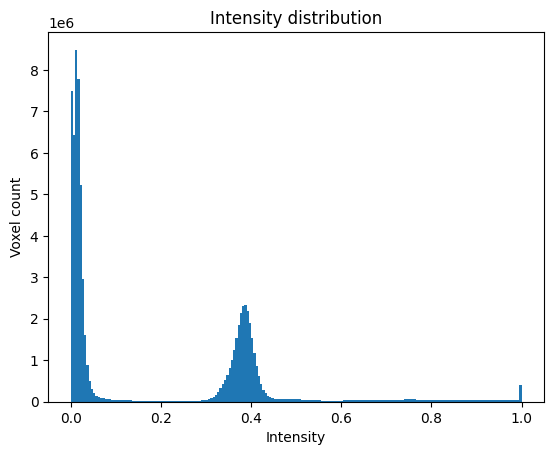

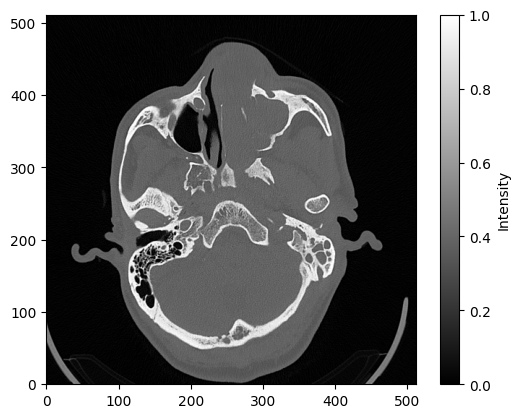

In [ ]:
# Load the NIfTI file
img = nib.load("Dataset001_MyDataset_Preprocessed/imagesTr/la_021_0000.nii.gz")

# Get the data array
data = img.get_fdata()   # shape: (X, Y, Z)

print("Shape:", data.shape)
print("Intensity range:", np.min(data), "to", np.max(data))

# Plot histogram of intensities
plt.hist(data.flatten(), bins=200)
plt.xlabel("Intensity")
plt.ylabel("Voxel count")
plt.title("Intensity distribution")
plt.show()

# Show a middle slice
mid_slice = data[:, :, data.shape[2]//2]
plt.imshow(mid_slice.T, cmap="gray", origin="lower")
plt.colorbar(label="Intensity")
plt.show()


In [ ]:
lbl = nib.load("Dataset001_MyDataset_Preprocessed/imagesTr/la_001_0000.nii.gz").get_fdata()
print(np.unique(lbl))

[0.00000000e+00 3.67241999e-04 7.34483998e-04 ... 9.99265492e-01
 9.99632776e-01 1.00000000e+00]


Move the labelsTr into the Preprocessed folder

In [ ]:
src = r"Dataset001_MyDataset/labelsTr"   # the folder containing subfolders
dst = r"Dataset001_MyDataset_Preprocessed/labelsTr"

# make sure destination exists
os.makedirs(os.path.dirname(dst), exist_ok=True)

# copy labelsTr
shutil.copytree(src, dst, dirs_exist_ok=True)

print(f"Copied {src} → {dst}")

Copied Dataset001_MyDataset/labelsTr → Dataset001_MyDataset_Preprocessed/labelsTr


Create the dataset.json file (required for nnUNet training)

In [ ]:
# Paths to your nnUNet dataset folders
imagesTr = r"Dataset001_MyDataset_Preprocessed/imagesTr"
labelsTr = r"Dataset001_MyDataset_Preprocessed/labelsTr"

# Collect all training cases
training_cases = []
for fname in sorted(os.listdir(imagesTr)):
    if fname.endswith("_0000.nii.gz"):  # only pick modality-0 images
        # nnU-Net expects image and label paths relative to dataset root
        image_path = f"./imagesTr/{fname}"
        label_fname = fname.replace("_0000", "")  # strip _0000
        label_path = f"./labelsTr/{label_fname}"

        if os.path.exists(os.path.join(labelsTr, label_fname)):
            training_cases.append({
                "image": image_path,
                "label": label_path
            })
        else:
            print(f"No label found for {fname}")

# Build dataset.json content
dataset = {
    "name": "MySegmentationDataset",
    "description": "Segmentation dataset",
    "tensorImageSize": "3D",
    "channel_names": {
        "0": "CT"  # change to MRI if your scans are MRIs
    },
    "labels": {
        "background": 0,
        "tumor": 1  # add more labels if needed
    },
    "file_ending": ".nii.gz",
    "numTraining": len(training_cases),
    "numTest": 0,
    "training": training_cases,
    "test": []
}

# Save dataset.json
with open("Dataset001_MyDataset_Preprocessed/dataset.json", "w") as f:
    json.dump(dataset, f, indent=4)

print(f"dataset.json created with {len(training_cases)} training cases")


dataset.json created with 32 training cases


Clone the nnUNet model

In [ ]:
!git clone https://github.com/MIC-DKFZ/nnUNet.git
%cd nnUNet
!pip install -e .


Cloning into 'nnUNet'...
remote: Enumerating objects: 14005, done.
remote: Total 14005 (delta 0), reused 0 (delta 0), pack-reused 14005 (from 1)
Receiving objects: 100% (14005/14005), 8.60 MiB | 38.47 MiB/s, done.
Resolving deltas: 100% (10703/10703), done.
/content/nnUNet
Obtaining file:///content/nnUNet
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 81.6 MB/s 

Create folders for nnUNet to use

In [ ]:
import os
os.makedirs("nnUNet_preprocessed", exist_ok=True)
os.makedirs("nnUNet_results", exist_ok=True)
os.makedirs("nnUNet_raw", exist_ok=True)


os.environ['nnUNet_raw'] = f"nnUNet_raw"
os.environ['nnUNet_preprocessed'] = f"nnUNet_preprocessed"
os.environ['nnUNet_results'] = f"nnUNet_results"

Move our preprocessed dataset into nnUNet_raw

In [ ]:
src = r"Dataset001_MyDataset_Preprocessed"   # the folder containing subfolders
dst = r"nnUNet_raw/Dataset001_MyDataset"

# make sure destination exists
os.makedirs(os.path.dirname(dst), exist_ok=True)

# copy labelsTr
shutil.copytree(src, dst, dirs_exist_ok=True)

print(f"Copied {src} → {dst}")

Copied Dataset001_MyDataset_Preprocessed → nnUNet_raw/Dataset001_MyDataset


Perform nnUNet's preprocessing

In [ ]:
!nnUNetv2_plan_and_preprocess -d 1 -c 3d_fullres --verify_dataset_integrity

Fingerprint extraction...
Dataset001_MyDataset
Using <class 'nnunetv2.imageio.simpleitk_reader_writer.SimpleITKIO'> as reader/writer

####################
verify_dataset_integrity Done. 
If you didn't see any error messages then your dataset is most likely OK!
####################

Using <class 'nnunetv2.imageio.simpleitk_reader_writer.SimpleITKIO'> as reader/writer
100% 32/32 [00:21<00:00,  1.47it/s]
Experiment planning...

############################
INFO: You are using the old nnU-Net default planner. We have updated our recommendations. Please consider using those instead! Read more here: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/resenc_presets.md
############################

Attempting to find 3d_lowres config. 
Current spacing: [0.61797485 0.4828125  0.4828125 ]. 
Current patch size: (np.int64(80), np.int64(192), np.int64(160)). 
Current median shape: [238.34951456 497.08737864 497.08737864]
Attempting to find 3d_lowres config. 
Current spacing: [0.6365141  0

Start training on the whole dataset

In [ ]:
!nnUNetv2_train 001 3d_fullres 0 --c


############################
INFO: You are using the old nnU-Net default plans. We have updated our recommendations. Please consider using those instead! Read more here: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/resenc_presets.md
############################

Using device: cuda:0

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

2025-10-11 16:56:19.336907: Using torch.compile...
2025-10-11 16:56:21.813386: do_dummy_2d_data_aug: False
2025-10-11 16:56:21.813852: Using splits from existing split file: nnUNet_preprocessed/Dataset001_MyDataset/splits_final.json
2025-10-11 16:56:21.814052: The split file contains 5 splits.
2

In [ ]:
!nnUNetv2_train 001 3d_fullres 1 --c

Streaming output truncated to the last 5000 lines.
2025-10-03 06:40:10.404741: Current learning rate: 0.00711
2025-10-03 06:40:50.447272: train_loss -0.7101
2025-10-03 06:40:50.447618: val_loss -0.7283
2025-10-03 06:40:50.447753: Pseudo dice [np.float32(0.7545)]
2025-10-03 06:40:50.447878: Epoch time: 40.04 s
2025-10-03 06:40:52.180319: 
2025-10-03 06:40:52.180637: Epoch 316
2025-10-03 06:40:52.180822: Current learning rate: 0.0071
2025-10-03 06:41:33.992006: train_loss -0.6877
2025-10-03 06:41:33.992239: val_loss -0.7557
2025-10-03 06:41:33.992445: Pseudo dice [np.float32(0.783)]
2025-10-03 06:41:33.992552: Epoch time: 41.81 s
2025-10-03 06:41:35.437671: 
2025-10-03 06:41:35.437938: Epoch 317
2025-10-03 06:41:35.438075: Current learning rate: 0.0071
2025-10-03 06:42:17.972275: train_loss -0.6957
2025-10-03 06:42:17.972614: val_loss -0.7106
2025-10-03 06:42:17.972778: Pseudo dice [np.float32(0.7018)]
2025-10-03 06:42:17.972926: Epoch time: 42.54 s
2025-10-03 06:42:19.641253: 
2025-10-0

Keep this here just for reference

In [ ]:
!nnUNetv2_train 001 3d_fullres all --c

Streaming output truncated to the last 5000 lines.
2025-10-02 08:21:44.081095: train_loss -0.6617
2025-10-02 08:21:44.081602: val_loss -0.7147
2025-10-02 08:21:44.081745: Pseudo dice [np.float32(0.771)]
2025-10-02 08:21:44.081869: Epoch time: 42.92 s
2025-10-02 08:21:45.722888: 
2025-10-02 08:21:45.723116: Epoch 318
2025-10-02 08:21:45.723315: Current learning rate: 0.00709
2025-10-02 08:22:27.889816: train_loss -0.653
2025-10-02 08:22:27.890406: val_loss -0.6682
2025-10-02 08:22:27.890773: Pseudo dice [np.float32(0.7181)]
2025-10-02 08:22:27.890963: Epoch time: 42.17 s
2025-10-02 08:22:29.608223: 
2025-10-02 08:22:29.608610: Epoch 319
2025-10-02 08:22:29.608778: Current learning rate: 0.00708
2025-10-02 08:23:11.989456: train_loss -0.6408
2025-10-02 08:23:11.989743: val_loss -0.6486
2025-10-02 08:23:11.989850: Pseudo dice [np.float32(0.7029)]
2025-10-02 08:23:11.989973: Epoch time: 42.38 s
2025-10-02 08:23:13.777079: 
2025-10-02 08:23:13.777371: Epoch 320
2025-10-02 08:23:13.777525: C

In [ ]:
import os
import time
import shutil

folder = "1. U nhú - raw"
now = time.time()

# Walk through all files and update timestamps
for root, dirs, files in os.walk(folder):
    for f in files:
        full_path = os.path.join(root, f)
        os.utime(full_path, (now, now))


Save results

In [ ]:
from google.colab import files


# Create a zip file from the preprocessed folder
shutil.make_archive("nnUNet_raws", 'zip', "1. U nhú - raw")
files.download("nnUNet_raws.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

files.download("nnUNet_results/Dataset001_MyDataset/nnUNetTrainer__nnUNetPlans__3d_fullres/fold_0/checkpoint_final.pth")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Create a zip file from the preprocessed folder
shutil.make_archive("nnUNet_labels", 'zip', "Dataset001_MyDataset/labelsTr")
files.download("nnUNet_labels.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Create a zip file from the preprocessed folder
shutil.make_archive("nnUNet_results", 'zip', "nnUNet_results")
files.download("nnUNet_results.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Create a zip file from the preprocessed folder
shutil.make_archive("nnUNet_preprocessed", 'zip', "nnUNet_preprocessed")
files.download("nnUNet_preprocessed.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Create a zip file from the preprocessed folder
shutil.make_archive("nnUNet_raw", 'zip', "nnUNet_raw")
files.download("nnUNet_raw.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!nnUNetv2_train 1 3d_fullres 0

Streaming output truncated to the last 5000 lines.
2025-09-14 10:04:10.903093: train_loss -0.5362
2025-09-14 10:04:10.903486: val_loss -0.3244
2025-09-14 10:04:10.903673: Pseudo dice [np.float32(0.4113)]
2025-09-14 10:04:10.903964: Epoch time: 39.0 s
2025-09-14 10:04:12.453477: 
2025-09-14 10:04:12.453848: Epoch 24
2025-09-14 10:04:12.454021: Current learning rate: 0.00978
2025-09-14 10:04:52.158159: train_loss -0.5393
2025-09-14 10:04:52.158522: val_loss -0.4373
2025-09-14 10:04:52.158800: Pseudo dice [np.float32(0.5214)]
2025-09-14 10:04:52.158984: Epoch time: 39.71 s
2025-09-14 10:04:52.159112: Yayy! New best EMA pseudo Dice: 0.45350000262260437
2025-09-14 10:04:54.261900: 
2025-09-14 10:04:54.262084: Epoch 25
2025-09-14 10:04:54.262233: Current learning rate: 0.00977
2025-09-14 10:05:35.153220: train_loss -0.5372
2025-09-14 10:05:35.153623: val_loss -0.3511
2025-09-14 10:05:35.153765: Pseudo dice [np.float32(0.4587)]
2025-09-14 10:05:35.153909: Epoch time: 40.89 s
2025-09-14 10:05:

Testing:
Download dataset 2 for testing on model trained on dataset 1

In [ ]:
# Google Drive file ID (from the shared link)
file_id = "1GKpXmcqbefmf7x4wtqGwUEX8YiU9l7k9"
file_name = "new_dataset.zip"
file_path = "/content/" + file_name

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", file_name, quiet=False)
print(f"Downloaded: {file_path}")

Downloading...
From (original): https://drive.google.com/uc?id=1GKpXmcqbefmf7x4wtqGwUEX8YiU9l7k9
From (redirected): https://drive.google.com/uc?id=1GKpXmcqbefmf7x4wtqGwUEX8YiU9l7k9&confirm=t&uuid=c73ffc41-6cff-4927-b379-41da1c403e14
To: /content/new_dataset.zip
100%|██████████| 2.35G/2.35G [00:29<00:00, 79.6MB/s]


Downloaded: /content/new_dataset.zip


In [ ]:
!unzip new_dataset.zip -d new_dataset/

Streaming output truncated to the last 5000 lines.
         continuing with "central" filename version
  inflating: new_dataset/Các ca đã label/43 - PHAM HUNG/ST000000/SE000002/IM000127  
Các ca đã label/43 - PHAM HUNG/ST000000/SE000002/IM000128:  mismatching "local" filename (C├бc ca ─С├г label/43 - PHAM HUNG/ST000000/SE000002/IM000128),
         continuing with "central" filename version
  inflating: new_dataset/Các ca đã label/43 - PHAM HUNG/ST000000/SE000002/IM000128  
Các ca đã label/43 - PHAM HUNG/ST000000/SE000002/IM000129:  mismatching "local" filename (C├бc ca ─С├г label/43 - PHAM HUNG/ST000000/SE000002/IM000129),
         continuing with "central" filename version
  inflating: new_dataset/Các ca đã label/43 - PHAM HUNG/ST000000/SE000002/IM000129  
Các ca đã label/43 - PHAM HUNG/ST000000/SE000002/IM000130:  mismatching "local" filename (C├бc ca ─С├г label/43 - PHAM HUNG/ST000000/SE000002/IM000130),
         continuing with "central" filename version
  inflating: new_dataset/Cá

Perform exact preprocessing steps like before training

In [ ]:
# Root containing all patient folders (22..., 23..., etc.)
seg_root = r"new_dataset/Các ca đã label"
labels_root = r"Dataset002_NewDataset/labelsTr"

os.makedirs(labels_root, exist_ok=True)

patient_id = 1

# Loop over patient folders (22..., 23..., 24...)
for patient_folder in sorted(os.listdir(seg_root)):
    patient_path = os.path.join(seg_root, patient_folder)
    if not os.path.isdir(patient_path):
        continue

    # Inside each patient → look for STxxxx
    for study_folder in sorted(os.listdir(patient_path)):
        study_path = os.path.join(patient_path, study_folder)
        if not os.path.isdir(study_path):
            continue

        # Inside study → look for SExxxx
        for series_folder in sorted(os.listdir(study_path)):
            series_path = os.path.join(study_path, series_folder)
            if not os.path.isdir(series_path):
                continue

            print(f"Processing: {series_path}")

            # Collect nii/nii.gz files inside
            nii_files = [
                os.path.join(series_path, f)
                for f in sorted(os.listdir(series_path))
                if f.endswith(('.nii', '.nii.gz'))
            ]

            if nii_files:
                # Take only the first nii file
                src_path = nii_files[0]

                # Rename into nnU-Net format
                new_filename = f"la_{patient_id:03d}.nii.gz"
                new_path = os.path.join(labels_root, new_filename)

                # Avoid collision
                counter = 1
                while os.path.exists(new_path):
                    new_filename = f"la_{patient_id:03d}_{counter}.nii.gz"
                    new_path = os.path.join(labels_root, new_filename)
                    counter += 1

                shutil.move(src_path, new_path)
                print(f"Moved: {src_path} -> {new_path}")

                # Increase patient counter
                patient_id += 1

            # Only one segmentation per patient → stop after first series
            break


Processing: new_dataset/Các ca đã label/22 - BUI DUC NAM/ST000000/SE000000
Moved: new_dataset/Các ca đã label/22 - BUI DUC NAM/ST000000/SE000000/BUI DUC NAM.nii.gz -> Dataset002_NewDataset/labelsTr/la_001.nii.gz
Processing: new_dataset/Các ca đã label/23 - CONG VAN DUNG/ST000000/SE000001
Moved: new_dataset/Các ca đã label/23 - CONG VAN DUNG/ST000000/SE000001/CONG VAN DUNG.nii.gz -> Dataset002_NewDataset/labelsTr/la_002.nii.gz
Processing: new_dataset/Các ca đã label/24 - DO THI NHANH/ST000000/SE000001
Moved: new_dataset/Các ca đã label/24 - DO THI NHANH/ST000000/SE000001/DO THI NHANH.nii.gz -> Dataset002_NewDataset/labelsTr/la_003.nii.gz
Processing: new_dataset/Các ca đã label/25 - HO CHI THANG/ST000000/SE000002
Moved: new_dataset/Các ca đã label/25 - HO CHI THANG/ST000000/SE000002/HO CHI THANG.nii.gz -> Dataset002_NewDataset/labelsTr/la_004.nii.gz
Processing: new_dataset/Các ca đã label/26 - LE VAN KHE/ST000000/SE000001
Moved: new_dataset/Các ca đã label/26 - LE VAN KHE/ST000000/SE0000

In [ ]:
# Input: folder containing all patient DICOM folders
dicom_root = r"new_dataset/Các ca đã label"
output_root = r"Dataset002_NewDataset/imagesTr"

In [ ]:
for patient in sorted(os.listdir(dicom_root)):
    patient_path = os.path.join(dicom_root, patient)
    if os.path.isdir(patient_path):
        print(f"Preparing {patient}...")

        # Flatten DICOMs into patient folder
        flatten_patient_folder(patient_path)

Preparing 01 - PHAM THI SU - raw...
Preparing 02 - PHAM NGOC ANH - raw...
Preparing 03 - HUYNH THI THANH XUAN - raw...
Preparing 04 - TRAN VAN BE - raw...
Preparing 05 - NGUYEN VAN SINH - raw...
Preparing 06 - TRAN HUNG DAO - raw...
Preparing 07 - LUC NGOC HAI - raw...
Preparing 08 - NGUYEN VAN THAO - raw...
Preparing 09 - HOANG VAN DANG - raw...
Preparing 10 - PHAN THI SAU - raw...
Preparing 11 - NGUYEN THI BE - raw...
Preparing 12 - TRAN THI TRANG - raw...
Preparing 13 - VO HOANG VAN - raw...
Preparing 14 - NGUYEN XUAN LOC - raw...
Preparing 15 - NGUYEN HUNG - raw...
Preparing 16 - NGUYEN THI NGUNG - raw...
Preparing 17 - TRAN TRUNG DUNG - raw...
Preparing 18 - HOANG THI TU HAN - raw...
Preparing 19 - NGUYEN QUANG TAN - raw...
Preparing 20 - TRUONG THI DANH - raw...
Preparing 21 - VAN DINH QUY - raw...
Preparing 22 - BUI DUC NAM...
Preparing 23 - CONG VAN DUNG...
Preparing 24 - DO THI NHANH...
Preparing 25 - HO CHI THANG...
Preparing 26 - LE VAN KHE...
Preparing 27 - NGUYEN HOANG HUN

In [ ]:
# Input: folder containing all patient DICOM folders
dicom_root = r"new_dataset/Các ca đã label"
output_root = r"Dataset002_NewDataset/imagesTr"

# Create output folder if not exists
os.makedirs(output_root, exist_ok=True)

# Patient counter
patient_id = 1

for patient in sorted(os.listdir(dicom_root)):
    patient_path = os.path.join(dicom_root, patient)
    if os.path.isdir(patient_path):
        print(f"Converting {patient}...")

        # Temporary output (dcm2niix will dump here)
        temp_out = os.path.join(output_root, "tmp")
        os.makedirs(temp_out, exist_ok=True)

        # Run dcm2niix
        subprocess.run([
            "dcm2niix",
            "-z", "y",              # gzip compression
            "-o", temp_out,         # output folder (temporary)
            patient_path            # input DICOM folder
        ])

        # Find the converted .nii.gz file
        for f in os.listdir(temp_out):
            if f.endswith(".nii") or f.endswith(".nii.gz"):
                old_path = os.path.join(temp_out, f)

                # Rename to nnU-Net format
                new_filename = f"la_{patient_id:03d}_0000.nii.gz"
                new_path = os.path.join(output_root, new_filename)

                # Ensure gzip compressed
                if not old_path.endswith(".nii.gz"):
                    new_path_tmp = new_path.replace(".nii.gz", ".nii")
                    shutil.move(old_path, new_path_tmp)
                    subprocess.run(["gzip", new_path_tmp])
                else:
                    shutil.move(old_path, new_path)

                print(f"Renamed to {new_filename}")

        # Clean up temp
        shutil.rmtree(temp_out)

        patient_id += 1


Converting 22 - BUI DUC NAM...
Renamed to la_001_0000.nii.gz
Converting 23 - CONG VAN DUNG...
Renamed to la_002_0000.nii.gz
Converting 24 - DO THI NHANH...
Renamed to la_003_0000.nii.gz
Converting 25 - HO CHI THANG...
Renamed to la_004_0000.nii.gz
Converting 26 - LE VAN KHE...
Renamed to la_005_0000.nii.gz
Converting 27 - NGUYEN HOANG HUNG...
Renamed to la_006_0000.nii.gz
Converting 28 - NGUYEN HOANG HUYNH...
Renamed to la_007_0000.nii.gz
Converting 29 - NGUYEN THANH LONG...
Renamed to la_008_0000.nii.gz
Converting 30 - NGUYEN VAN CHINH...
Renamed to la_009_0000.nii.gz
Converting 31 - NGUYEN VAN KY...
Renamed to la_010_0000.nii.gz
Converting 32 - NGUYEN VAN MUOI...
Renamed to la_011_0000.nii.gz
Converting 33 - NGUYEN VAN UT...
Renamed to la_012_0000.nii.gz
Converting 34 - PHAM VAN TUAN...
Renamed to la_013_0000.nii.gz
Converting 35 - QUACH NGOC THANH...
Renamed to la_014_0000.nii.gz
Converting 36 - TRAN VAN HONG...
Renamed to la_015_0000.nii.gz
Converting 37 - TRUONG THI TRUC...
Rename

In [ ]:
ref_root = r"Dataset002_NewDataset/imagesTr"
seg_root = r"Dataset002_NewDataset/labelsTr"

for f in os.listdir(ref_root):
    if not f.endswith(".nii.gz"):
        continue

    ref_path = os.path.join(ref_root, f)
    seg_path = os.path.join(seg_root, f.replace("_0000", ""))  # Remove _0000 for label files

    if not os.path.exists(seg_path):
        print(f"No segmentation found for {f}")
        continue

    print(f"Resampling {seg_path} -> match {ref_path}")

    # Load images
    ref = nib.load(ref_path)
    seg = nib.load(seg_path)

    # Resample segmentation to match reference
    seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')

    # Save output
    nib.save(seg_resampled, seg_path)


Resampling Dataset002_NewDataset/labelsTr/la_017.nii.gz -> match Dataset002_NewDataset/imagesTr/la_017_0000.nii.gz


/tmp/ipython-input-682230399.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-682230399.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset002_NewDataset/labelsTr/la_008.nii.gz -> match Dataset002_NewDataset/imagesTr/la_008_0000.nii.gz


/tmp/ipython-input-682230399.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-682230399.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset002_NewDataset/labelsTr/la_006.nii.gz -> match Dataset002_NewDataset/imagesTr/la_006_0000.nii.gz


/tmp/ipython-input-682230399.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-682230399.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset002_NewDataset/labelsTr/la_005.nii.gz -> match Dataset002_NewDataset/imagesTr/la_005_0000.nii.gz


/tmp/ipython-input-682230399.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-682230399.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset002_NewDataset/labelsTr/la_018.nii.gz -> match Dataset002_NewDataset/imagesTr/la_018_0000.nii.gz


/tmp/ipython-input-682230399.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-682230399.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset002_NewDataset/labelsTr/la_026.nii.gz -> match Dataset002_NewDataset/imagesTr/la_026_0000.nii.gz


/tmp/ipython-input-682230399.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-682230399.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset002_NewDataset/labelsTr/la_012.nii.gz -> match Dataset002_NewDataset/imagesTr/la_012_0000.nii.gz


/tmp/ipython-input-682230399.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-682230399.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset002_NewDataset/labelsTr/la_024.nii.gz -> match Dataset002_NewDataset/imagesTr/la_024_0000.nii.gz


/tmp/ipython-input-682230399.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-682230399.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset002_NewDataset/labelsTr/la_019.nii.gz -> match Dataset002_NewDataset/imagesTr/la_019_0000.nii.gz


/tmp/ipython-input-682230399.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-682230399.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset002_NewDataset/labelsTr/la_004.nii.gz -> match Dataset002_NewDataset/imagesTr/la_004_0000.nii.gz


/tmp/ipython-input-682230399.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-682230399.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset002_NewDataset/labelsTr/la_007.nii.gz -> match Dataset002_NewDataset/imagesTr/la_007_0000.nii.gz


/tmp/ipython-input-682230399.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-682230399.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset002_NewDataset/labelsTr/la_028.nii.gz -> match Dataset002_NewDataset/imagesTr/la_028_0000.nii.gz


/tmp/ipython-input-682230399.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-682230399.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset002_NewDataset/labelsTr/la_020.nii.gz -> match Dataset002_NewDataset/imagesTr/la_020_0000.nii.gz


/tmp/ipython-input-682230399.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-682230399.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset002_NewDataset/labelsTr/la_025.nii.gz -> match Dataset002_NewDataset/imagesTr/la_025_0000.nii.gz


/tmp/ipython-input-682230399.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-682230399.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset002_NewDataset/labelsTr/la_003.nii.gz -> match Dataset002_NewDataset/imagesTr/la_003_0000.nii.gz


/tmp/ipython-input-682230399.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-682230399.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset002_NewDataset/labelsTr/la_002.nii.gz -> match Dataset002_NewDataset/imagesTr/la_002_0000.nii.gz


/tmp/ipython-input-682230399.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-682230399.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset002_NewDataset/labelsTr/la_014.nii.gz -> match Dataset002_NewDataset/imagesTr/la_014_0000.nii.gz


/tmp/ipython-input-682230399.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-682230399.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset002_NewDataset/labelsTr/la_001.nii.gz -> match Dataset002_NewDataset/imagesTr/la_001_0000.nii.gz


/tmp/ipython-input-682230399.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-682230399.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset002_NewDataset/labelsTr/la_013.nii.gz -> match Dataset002_NewDataset/imagesTr/la_013_0000.nii.gz


/tmp/ipython-input-682230399.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-682230399.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset002_NewDataset/labelsTr/la_027.nii.gz -> match Dataset002_NewDataset/imagesTr/la_027_0000.nii.gz


/tmp/ipython-input-682230399.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-682230399.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset002_NewDataset/labelsTr/la_023.nii.gz -> match Dataset002_NewDataset/imagesTr/la_023_0000.nii.gz


/tmp/ipython-input-682230399.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-682230399.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset002_NewDataset/labelsTr/la_010.nii.gz -> match Dataset002_NewDataset/imagesTr/la_010_0000.nii.gz


/tmp/ipython-input-682230399.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-682230399.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset002_NewDataset/labelsTr/la_021.nii.gz -> match Dataset002_NewDataset/imagesTr/la_021_0000.nii.gz


/tmp/ipython-input-682230399.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-682230399.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset002_NewDataset/labelsTr/la_022.nii.gz -> match Dataset002_NewDataset/imagesTr/la_022_0000.nii.gz


/tmp/ipython-input-682230399.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-682230399.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset002_NewDataset/labelsTr/la_009.nii.gz -> match Dataset002_NewDataset/imagesTr/la_009_0000.nii.gz


/tmp/ipython-input-682230399.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-682230399.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset002_NewDataset/labelsTr/la_015.nii.gz -> match Dataset002_NewDataset/imagesTr/la_015_0000.nii.gz


/tmp/ipython-input-682230399.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-682230399.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset002_NewDataset/labelsTr/la_011.nii.gz -> match Dataset002_NewDataset/imagesTr/la_011_0000.nii.gz


/tmp/ipython-input-682230399.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-682230399.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


Resampling Dataset002_NewDataset/labelsTr/la_016.nii.gz -> match Dataset002_NewDataset/imagesTr/la_016_0000.nii.gz


/tmp/ipython-input-682230399.py:22: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')
/tmp/ipython-input-682230399.py:22: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  seg_resampled = nimg.resample_to_img(seg, ref, interpolation='nearest')


In [ ]:
# 🔹 Apply to dataset
input_dir = "Dataset002_NewDataset/imagesTr"
output_dir = "Dataset002_NewDataset_Preprocessed/imagesTr"
os.makedirs(output_dir, exist_ok=True)

for path in glob(os.path.join(input_dir, "*.nii.gz")):
    fname = os.path.basename(path)
    out_path = os.path.join(output_dir, fname)
    print(f"Processing {fname} → {out_path}")
    preprocess_image(path, out_path)
    normalize_image(path, out_path, method="minmax")  # change to "zscore" if needed



Processing la_017_0000.nii.gz → Dataset002_NewDataset_Preprocessed/imagesTr/la_017_0000.nii.gz
Processing la_008_0000.nii.gz → Dataset002_NewDataset_Preprocessed/imagesTr/la_008_0000.nii.gz
Processing la_006_0000.nii.gz → Dataset002_NewDataset_Preprocessed/imagesTr/la_006_0000.nii.gz
Processing la_005_0000.nii.gz → Dataset002_NewDataset_Preprocessed/imagesTr/la_005_0000.nii.gz
Processing la_018_0000.nii.gz → Dataset002_NewDataset_Preprocessed/imagesTr/la_018_0000.nii.gz
Processing la_026_0000.nii.gz → Dataset002_NewDataset_Preprocessed/imagesTr/la_026_0000.nii.gz
Processing la_012_0000.nii.gz → Dataset002_NewDataset_Preprocessed/imagesTr/la_012_0000.nii.gz
Processing la_024_0000.nii.gz → Dataset002_NewDataset_Preprocessed/imagesTr/la_024_0000.nii.gz
Processing la_019_0000.nii.gz → Dataset002_NewDataset_Preprocessed/imagesTr/la_019_0000.nii.gz
Processing la_004_0000.nii.gz → Dataset002_NewDataset_Preprocessed/imagesTr/la_004_0000.nii.gz
Processing la_007_0000.nii.gz → Dataset002_NewData

Shape: (512, 512, 220)
Intensity range: 0.0 to 1.0


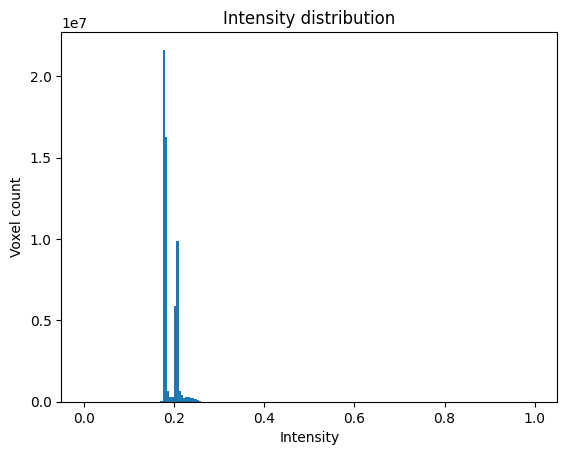

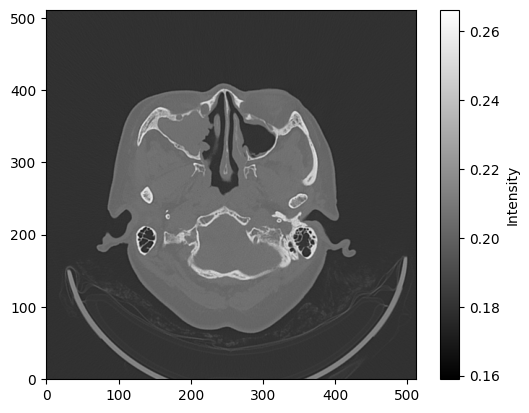

In [ ]:
# Load the NIfTI file
img = nib.load("Dataset002_NewDataset_Preprocessed/imagesTr/la_028_0000.nii.gz")

# Get the data array
data = img.get_fdata()   # shape: (X, Y, Z)

print("Shape:", data.shape)
print("Intensity range:", np.min(data), "to", np.max(data))

# Plot histogram of intensities
plt.hist(data.flatten(), bins=200)
plt.xlabel("Intensity")
plt.ylabel("Voxel count")
plt.title("Intensity distribution")
plt.show()

# Show a middle slice
mid_slice = data[:, :, data.shape[2]//2]
plt.imshow(mid_slice.T, cmap="gray", origin="lower")
plt.colorbar(label="Intensity")
plt.show()


Download nnU_results to infer using this model

In [ ]:
import SimpleITK as sitk
import os
from glob import glob

def histogram_match_image(moving_image, reference_image, bins=256, match_points=50):
    """
    Adjust intensity distribution of moving_image to match reference_image.
    """
    matcher = sitk.HistogramMatchingImageFilter()
    matcher.SetNumberOfHistogramLevels(bins)
    matcher.SetNumberOfMatchPoints(match_points)
    matcher.ThresholdAtMeanIntensityOn()
    return matcher.Execute(moving_image, reference_image)

# Paths
input_dir = r"Dataset002_NewDataset_Preprocessed/imagesTr"
output_dir = r"Dataset001_NewDataset_Preprocessed/imagesTr"
os.makedirs(output_dir, exist_ok=True)

# Pick a reference image (the one that looks "good")
reference_path = os.path.join(input_dir, "la_001_0000.nii.gz")  # <-- change if needed
reference_img = sitk.ReadImage(reference_path)

# Loop over all .nii.gz images
for path in glob(os.path.join(input_dir, "*.nii.gz")):
    fname = os.path.basename(path)
    out_path = os.path.join(output_dir, fname)

    print(f"Processing {fname} → {out_path}")

    moving_img = sitk.ReadImage(path)
    matched_img = histogram_match_image(moving_img, reference_img)

    sitk.WriteImage(matched_img, out_path)

print("✅ Histogram matching completed for all images.")


Processing la_017_0000.nii.gz → Dataset001_NewDataset_Preprocessed/imagesTr/la_017_0000.nii.gz
Processing la_008_0000.nii.gz → Dataset001_NewDataset_Preprocessed/imagesTr/la_008_0000.nii.gz
Processing la_006_0000.nii.gz → Dataset001_NewDataset_Preprocessed/imagesTr/la_006_0000.nii.gz
Processing la_005_0000.nii.gz → Dataset001_NewDataset_Preprocessed/imagesTr/la_005_0000.nii.gz
Processing la_018_0000.nii.gz → Dataset001_NewDataset_Preprocessed/imagesTr/la_018_0000.nii.gz
Processing la_026_0000.nii.gz → Dataset001_NewDataset_Preprocessed/imagesTr/la_026_0000.nii.gz
Processing la_012_0000.nii.gz → Dataset001_NewDataset_Preprocessed/imagesTr/la_012_0000.nii.gz
Processing la_024_0000.nii.gz → Dataset001_NewDataset_Preprocessed/imagesTr/la_024_0000.nii.gz
Processing la_019_0000.nii.gz → Dataset001_NewDataset_Preprocessed/imagesTr/la_019_0000.nii.gz
Processing la_004_0000.nii.gz → Dataset001_NewDataset_Preprocessed/imagesTr/la_004_0000.nii.gz
Processing la_007_0000.nii.gz → Dataset001_NewData

In [ ]:
import gdown
# Google Drive file ID (from the shared link)
file_id = "17NhcFTSrZWpK94nt23paT49N_ly_OZjH"
file_name = "nnU_results.zip"
file_path = "/content/" + file_name

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", file_name, quiet=False)
print(f"Downloaded: {file_path}")

Downloading...
From (original): https://drive.google.com/uc?id=17NhcFTSrZWpK94nt23paT49N_ly_OZjH
From (redirected): https://drive.google.com/uc?id=17NhcFTSrZWpK94nt23paT49N_ly_OZjH&confirm=t&uuid=bc76dc55-dc58-4003-9048-6eb6599cfa05
To: /content/nnU_results.zip
100%|██████████| 460M/460M [00:04<00:00, 111MB/s] 

Downloaded: /content/nnU_results.zip


In [ ]:
!unzip nnU_results.zip -d nnUNet_results/

Archive:  nnU_results.zip
   creating: nnUNet_results/Dataset001_MyDataset/
   creating: nnUNet_results/Dataset001_MyDataset/nnUNetTrainer__nnUNetPlans__3d_fullres/
   creating: nnUNet_results/Dataset001_MyDataset/nnUNetTrainer__nnUNetPlans__3d_fullres/fold_all/
  inflating: nnUNet_results/Dataset001_MyDataset/nnUNetTrainer__nnUNetPlans__3d_fullres/plans.json  
  inflating: nnUNet_results/Dataset001_MyDataset/nnUNetTrainer__nnUNetPlans__3d_fullres/dataset_fingerprint.json  
  inflating: nnUNet_results/Dataset001_MyDataset/nnUNetTrainer__nnUNetPlans__3d_fullres/dataset.json  
   creating: nnUNet_results/Dataset001_MyDataset/nnUNetTrainer__nnUNetPlans__3d_fullres/fold_all/validation/
  inflating: nnUNet_results/Dataset001_MyDataset/nnUNetTrainer__nnUNetPlans__3d_fullres/fold_all/checkpoint_final.pth  
  inflating: nnUNet_results/Dataset001_MyDataset/nnUNetTrainer__nnUNetPlans__3d_fullres/fold_all/training_log_2025_8_31_06_21_10.txt  
  inflating: nnUNet_results/Dataset001_MyDataset/nnUNe

In [ ]:
src = r"Dataset002_NewDataset/labelsTr"   # the folder containing subfolders
dst = r"Dataset002_NewDataset_Preprocessed/labelsTr"

# make sure destination exists
os.makedirs(os.path.dirname(dst), exist_ok=True)

# copy labelsTr
shutil.copytree(src, dst, dirs_exist_ok=True)

print(f"Copied {src} → {dst}")

Copied Dataset002_NewDataset/labelsTr → Dataset002_NewDataset_Preprocessed/labelsTr


In [ ]:
import json

# Paths to your nnUNet dataset folders
imagesTr = r"Dataset002_NewDataset_Preprocessed/imagesTr"
labelsTr = r"Dataset002_NewDataset_Preprocessed/labelsTr"


# Collect all training cases
training_cases = []
for fname in sorted(os.listdir(imagesTr)):
    if fname.endswith(".nii.gz"):
        # nnU-Net expects that image file names end with _0000.nii.gz
        image_path = f"./imagesTr/{fname}"
        label_path = f"./labelsTr/{fname.replace('_0000', '')}"

        if os.path.exists(os.path.join(labelsTr, f"{fname.replace('_0000', '')}")):
            training_cases.append({
                "image": image_path,
                "label": label_path
            })
        else:
            print(f"Warning: No label found for {fname}")

# Build dataset.json content
dataset = {
    "name": "MySegmentationDataset",
    "description": "Segmentation dataset",
    "tensorImageSize": "3D",
    "channel_names": {
        "0": "CT"  # change to MRI if your scans are MRIs
    },
    "labels": {
        "background": 0,
        "tumor": 1  # add more labels if needed
    },
    "file_ending": ".nii.gz",
    "numTraining": len(training_cases),
    "numTest": 0,
    "training": training_cases,
    "test": []
}

# Save dataset.json
with open("Dataset002_NewDataset_Preprocessed/dataset.json", "w") as f:
    json.dump(dataset, f, indent=4)

print(f"dataset.json created with {len(training_cases)} training cases")


dataset.json created with 28 training cases


Prediction

In [ ]:
!nnUNetv2_predict \
    -i Dataset002_NewDataset_Preprocessed/imagesTr \
    -o test_predictions \
    -d 1 \
    -c 3d_fullres \
    -f all


#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 0 cases in the source folder
I am processing 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 0 cases that I would like to predict


Check dice of results

In [ ]:
import os
import SimpleITK as sitk
import numpy as np

def dice_coefficient(gt_file, pred_file, label=1):
    gt = sitk.GetArrayFromImage(sitk.ReadImage(gt_file))
    pred = sitk.GetArrayFromImage(sitk.ReadImage(pred_file))

    gt_bin = (gt == label).astype(np.uint8)
    pred_bin = (pred == label).astype(np.uint8)

    intersection = np.sum(gt_bin * pred_bin)
    denominator = np.sum(gt_bin) + np.sum(pred_bin)

    if denominator == 0:
        return 1.0 if np.sum(gt_bin) == 0 and np.sum(pred_bin) == 0 else 0.0

    return 2.0 * intersection / denominator


# Paths
gt_root = "Dataset002_NewDataset_Preprocessed/labelsTr"
pred_root = "test_predictions"
dices = []

# Loop through predictions
for pred_file in sorted(os.listdir(pred_root)):
    if not pred_file.endswith(".nii.gz"):
        continue

    # Predictions usually named like la_001.nii.gz
    gt_file = os.path.join(gt_root, pred_file)
    pred_path = os.path.join(pred_root, pred_file)

    if not os.path.exists(gt_file):
        print(f"No ground truth for {pred_file}, skipping.")
        continue

    dice = dice_coefficient(gt_file, pred_path, label=1)
    dices.append(dice)
    print(f"{pred_file}: Dice = {dice:.4f}")
print(f"Mean Dice: {np.mean(dices):.4f}")


la_001.nii.gz: Dice = 0.6793
la_002.nii.gz: Dice = 0.0000
la_003.nii.gz: Dice = 0.0000
la_004.nii.gz: Dice = 0.0000
la_005.nii.gz: Dice = 0.8446
la_006.nii.gz: Dice = 0.0000
la_007.nii.gz: Dice = 0.0000
la_008.nii.gz: Dice = 0.0000
la_009.nii.gz: Dice = 0.0000
la_010.nii.gz: Dice = 0.0000
la_011.nii.gz: Dice = 0.3429
la_012.nii.gz: Dice = 0.0000
la_013.nii.gz: Dice = 0.0000
la_014.nii.gz: Dice = 0.0000
la_015.nii.gz: Dice = 0.0000
la_016.nii.gz: Dice = 0.0000
la_017.nii.gz: Dice = 0.0000
la_018.nii.gz: Dice = 0.0000
la_019.nii.gz: Dice = 0.0000
la_020.nii.gz: Dice = 0.0000
la_021.nii.gz: Dice = 0.0000
la_022.nii.gz: Dice = 0.0000
la_023.nii.gz: Dice = 0.0000
la_024.nii.gz: Dice = 0.0000
la_025.nii.gz: Dice = 0.0000
la_026.nii.gz: Dice = 0.0000
la_027.nii.gz: Dice = 0.0000
la_028.nii.gz: Dice = 0.0000
Mean Dice: 0.0667


In [ ]:
import nibabel as nib
import os
import nilearn.image as nimg

ref_root = r"Dataset002_NewDataset/imagesTr"
pred_root = r"test_predictions"
out_root = r"aligned_predictions"

os.makedirs(out_root, exist_ok=True)

for f in os.listdir(ref_root):
    if not f.endswith(".nii.gz") or "_0000" not in f:
        continue

    ref_path = os.path.join(ref_root, f)
    pred_path = os.path.join(pred_root, f.replace("_0000", ""))
    out_path = os.path.join(out_root, f.replace("_0000", ""))

    if not os.path.exists(pred_path):
        print(f"No prediction for {f}")
        continue

    print(f"Aligning {pred_path} -> {ref_path}")

    # Load reference (original DICOM-converted) and prediction
    ref_img = nib.load(ref_path)
    pred_img = nib.load(pred_path)

    # Resample prediction into reference voxel grid
    pred_resampled = nimg.resample_to_img(
        pred_img, ref_img, interpolation="nearest"
    )

    # Force reference affine & header (keeps exact orientation/position)
    pred_resampled = nib.Nifti1Image(
        pred_resampled.get_fdata().astype("int16"),
        ref_img.affine,
        ref_img.header
    )

    nib.save(pred_resampled, out_path)
    print(f"Saved: {out_path}")


Aligning test_predictions/la_001.nii.gz -> Dataset002_NewDataset/imagesTr/la_001_0000.nii.gz


/tmp/ipython-input-1360632141.py:30: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  pred_resampled = nimg.resample_to_img(
/tmp/ipython-input-1360632141.py:30: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  pred_resampled = nimg.resample_to_img(


Saved: aligned_predictions/la_001.nii.gz


In [ ]:
!pip install pydicom nibabel


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 80.9 MB/s eta 0:00:00


This is for download results, we resample the predicted segmentation again (to suit the dicom files)

In [ ]:
import os
import nibabel as nib
import numpy as np
from nilearn.image import resample_img

# Folders
ref_root = "reflabelsTr"   # folder containing reference NIfTIs (from dcm2niix)
pred_root = "test_predictions"      # nnU-Net predictions
out_root = "test_predictions_aligned"
os.makedirs(out_root, exist_ok=True)

for pred_file in sorted(os.listdir(pred_root)):
    if not pred_file.endswith(".nii.gz"):
        continue

    pred_path = os.path.join(pred_root, pred_file)

    # Find corresponding reference file (assuming similar naming e.g. la_001 -> la_001_ref.nii.gz)
    # Adjust this rule if your reference naming differs!
    ref_name = pred_file.replace(".nii.gz", ".nii.gz")
    ref_path = os.path.join(ref_root, ref_name)

    if not os.path.exists(ref_path):
        print(f"⚠️ No reference found for {pred_file}, skipping.")
        continue

    # Load reference and prediction
    ref = nib.load(ref_path)
    pred = nib.load(pred_path)

    # Resample prediction into reference grid
    pred_resampled = resample_img(
        pred,
        target_affine=ref.affine,
        target_shape=ref.shape,
        interpolation="nearest"   # keep labels discrete
    )

    # Save aligned segmentation
    out_path = os.path.join(out_root, pred_file.replace(".nii.gz", "_aligned_to_ref.nii.gz"))
    aligned_seg = nib.Nifti1Image(pred_resampled.get_fdata().astype(np.uint8), ref.affine, ref.header)
    nib.save(aligned_seg, out_path)

    print(f"✅ Saved aligned segmentation: {out_path}")


/tmp/ipython-input-963771709.py:32: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  pred_resampled = resample_img(
/tmp/ipython-input-963771709.py:32: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  pred_resampled = resample_img(


✅ Saved aligned segmentation: test_predictions_aligned/la_001_aligned_to_ref.nii.gz


/tmp/ipython-input-963771709.py:32: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  pred_resampled = resample_img(
/tmp/ipython-input-963771709.py:32: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  pred_resampled = resample_img(


✅ Saved aligned segmentation: test_predictions_aligned/la_002_aligned_to_ref.nii.gz


/tmp/ipython-input-963771709.py:32: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  pred_resampled = resample_img(
/tmp/ipython-input-963771709.py:32: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  pred_resampled = resample_img(


✅ Saved aligned segmentation: test_predictions_aligned/la_003_aligned_to_ref.nii.gz


/tmp/ipython-input-963771709.py:32: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  pred_resampled = resample_img(
/tmp/ipython-input-963771709.py:32: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  pred_resampled = resample_img(


✅ Saved aligned segmentation: test_predictions_aligned/la_004_aligned_to_ref.nii.gz


/tmp/ipython-input-963771709.py:32: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  pred_resampled = resample_img(
/tmp/ipython-input-963771709.py:32: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  pred_resampled = resample_img(


✅ Saved aligned segmentation: test_predictions_aligned/la_005_aligned_to_ref.nii.gz


/tmp/ipython-input-963771709.py:32: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  pred_resampled = resample_img(
/tmp/ipython-input-963771709.py:32: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  pred_resampled = resample_img(


✅ Saved aligned segmentation: test_predictions_aligned/la_006_aligned_to_ref.nii.gz


/tmp/ipython-input-963771709.py:32: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  pred_resampled = resample_img(
/tmp/ipython-input-963771709.py:32: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  pred_resampled = resample_img(


✅ Saved aligned segmentation: test_predictions_aligned/la_007_aligned_to_ref.nii.gz


/tmp/ipython-input-963771709.py:32: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  pred_resampled = resample_img(
/tmp/ipython-input-963771709.py:32: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  pred_resampled = resample_img(


✅ Saved aligned segmentation: test_predictions_aligned/la_008_aligned_to_ref.nii.gz


/tmp/ipython-input-963771709.py:32: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  pred_resampled = resample_img(
/tmp/ipython-input-963771709.py:32: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  pred_resampled = resample_img(


✅ Saved aligned segmentation: test_predictions_aligned/la_009_aligned_to_ref.nii.gz


/tmp/ipython-input-963771709.py:32: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  pred_resampled = resample_img(
/tmp/ipython-input-963771709.py:32: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  pred_resampled = resample_img(


✅ Saved aligned segmentation: test_predictions_aligned/la_010_aligned_to_ref.nii.gz


/tmp/ipython-input-963771709.py:32: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  pred_resampled = resample_img(
/tmp/ipython-input-963771709.py:32: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  pred_resampled = resample_img(


✅ Saved aligned segmentation: test_predictions_aligned/la_011_aligned_to_ref.nii.gz


/tmp/ipython-input-963771709.py:32: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  pred_resampled = resample_img(
/tmp/ipython-input-963771709.py:32: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  pred_resampled = resample_img(


✅ Saved aligned segmentation: test_predictions_aligned/la_012_aligned_to_ref.nii.gz


/tmp/ipython-input-963771709.py:32: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  pred_resampled = resample_img(
/tmp/ipython-input-963771709.py:32: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  pred_resampled = resample_img(


✅ Saved aligned segmentation: test_predictions_aligned/la_013_aligned_to_ref.nii.gz


/tmp/ipython-input-963771709.py:32: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  pred_resampled = resample_img(
/tmp/ipython-input-963771709.py:32: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  pred_resampled = resample_img(


✅ Saved aligned segmentation: test_predictions_aligned/la_014_aligned_to_ref.nii.gz


/tmp/ipython-input-963771709.py:32: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  pred_resampled = resample_img(
/tmp/ipython-input-963771709.py:32: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  pred_resampled = resample_img(


✅ Saved aligned segmentation: test_predictions_aligned/la_015_aligned_to_ref.nii.gz


/tmp/ipython-input-963771709.py:32: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  pred_resampled = resample_img(
/tmp/ipython-input-963771709.py:32: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  pred_resampled = resample_img(


✅ Saved aligned segmentation: test_predictions_aligned/la_016_aligned_to_ref.nii.gz


/tmp/ipython-input-963771709.py:32: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  pred_resampled = resample_img(
/tmp/ipython-input-963771709.py:32: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  pred_resampled = resample_img(


✅ Saved aligned segmentation: test_predictions_aligned/la_017_aligned_to_ref.nii.gz


/tmp/ipython-input-963771709.py:32: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  pred_resampled = resample_img(
/tmp/ipython-input-963771709.py:32: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  pred_resampled = resample_img(


✅ Saved aligned segmentation: test_predictions_aligned/la_018_aligned_to_ref.nii.gz


/tmp/ipython-input-963771709.py:32: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  pred_resampled = resample_img(
/tmp/ipython-input-963771709.py:32: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  pred_resampled = resample_img(


✅ Saved aligned segmentation: test_predictions_aligned/la_019_aligned_to_ref.nii.gz


/tmp/ipython-input-963771709.py:32: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  pred_resampled = resample_img(
/tmp/ipython-input-963771709.py:32: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  pred_resampled = resample_img(


✅ Saved aligned segmentation: test_predictions_aligned/la_020_aligned_to_ref.nii.gz


/tmp/ipython-input-963771709.py:32: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  pred_resampled = resample_img(
/tmp/ipython-input-963771709.py:32: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  pred_resampled = resample_img(


✅ Saved aligned segmentation: test_predictions_aligned/la_021_aligned_to_ref.nii.gz


/tmp/ipython-input-963771709.py:32: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  pred_resampled = resample_img(
/tmp/ipython-input-963771709.py:32: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  pred_resampled = resample_img(


✅ Saved aligned segmentation: test_predictions_aligned/la_022_aligned_to_ref.nii.gz


/tmp/ipython-input-963771709.py:32: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  pred_resampled = resample_img(
/tmp/ipython-input-963771709.py:32: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  pred_resampled = resample_img(


✅ Saved aligned segmentation: test_predictions_aligned/la_023_aligned_to_ref.nii.gz


/tmp/ipython-input-963771709.py:32: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  pred_resampled = resample_img(
/tmp/ipython-input-963771709.py:32: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  pred_resampled = resample_img(


✅ Saved aligned segmentation: test_predictions_aligned/la_024_aligned_to_ref.nii.gz


/tmp/ipython-input-963771709.py:32: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  pred_resampled = resample_img(
/tmp/ipython-input-963771709.py:32: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  pred_resampled = resample_img(


✅ Saved aligned segmentation: test_predictions_aligned/la_025_aligned_to_ref.nii.gz


/tmp/ipython-input-963771709.py:32: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  pred_resampled = resample_img(
/tmp/ipython-input-963771709.py:32: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  pred_resampled = resample_img(


✅ Saved aligned segmentation: test_predictions_aligned/la_026_aligned_to_ref.nii.gz


/tmp/ipython-input-963771709.py:32: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  pred_resampled = resample_img(
/tmp/ipython-input-963771709.py:32: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  pred_resampled = resample_img(


✅ Saved aligned segmentation: test_predictions_aligned/la_027_aligned_to_ref.nii.gz


/tmp/ipython-input-963771709.py:32: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  pred_resampled = resample_img(
/tmp/ipython-input-963771709.py:32: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  pred_resampled = resample_img(


✅ Saved aligned segmentation: test_predictions_aligned/la_028_aligned_to_ref.nii.gz


In [ ]:
import shutil

# Zip the aligned folder
shutil.make_archive("test_predictions_aligned", 'zip', "test_predictions_aligned")

print("✅ Zipped folder: test_predictions_aligned.zip")

✅ Zipped folder: test_predictions_aligned.zip


In [ ]:
from google.colab import files
files.download("test_predictions_aligned.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!sudo apt-get install -y dcmqi


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package dcmqi


In [ ]:
!itkimage2segimage \
    --inputImageList test_predictions/la_001.nii.gz \
    --inputDICOMDirectory 'new_dataset/ĐỢT 2 (tháng 9 2025)/Các ca đã label/22 - BUI DUC NAM/ST000000/SE000000' \
    --outputDICOM la_001.nii.gz \
    --segmentAlgorithmName nnUNet \
    --segmentLabel "Left Atrium"


/bin/bash: line 1: itkimage2segimage: command not found
